# UNIT 14 우리동네와 인구 구조가 가장 비슷한 동네를 찾는 코드 

#### 공공데이터 포털 (https://www.data.go.kr/index.do)

1. 데이터를 읽어오자

In [ ]:
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)

for row in data:
    print(row)

데이터 속성을 설명하는 첫 행이 너무 기니까 없애기 위해 헤더를 제외하자

In [ ]:
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
for row in data:
    print(row)

2. 궁금한 지역 이름을 입력해보자

In [4]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 :')

In [5]:
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
home = []   # 여기에 원하는 지역 데이터를 저장할거야
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')

for row in data:
    if name in row[0]:     # 위에서 봤듯이 맨앞이 지역이름이니까 [0]
        for i in row[3:]:  # 행정구역[0] 제외, 총인구수[1]랑 연령구간인구수[2]는 안궁금하니까 [3:]
            home.append(int(i))   # 숫자로 저장하자
   
print(home)

[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


In [6]:
import numpy as np   # 배운거 써먹어보자
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 :')

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)   # for구문 두줄을 넘파이 덕분에 한줄로!
   
print(home)

[326 334 406 413 389 408 417 434 411 387 420 383 354 357 340 338 349 339
 407 380 390 453 424 516 451 466 448 484 471 476 558 541 579 619 638 740
 756 792 745 789 671 687 700 636 726 691 657 619 649 585 579 470 522 534
 563 445 511 569 572 513 532 456 426 497 379 384 399 279 289 276 268 271
 223 170 150 154 177 140 126 114 121  97  86  80  59  48  44  43  28  29
  22  15  13  12   5   8   5   4   2   3   7]


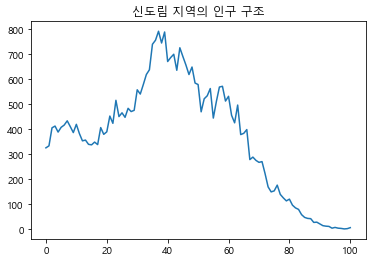

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title(name + ' 지역의 인구 구조')
plt.plot(home)
plt.show()

### 이제 본격 궁금한 지역의 인구구조와 가장 비슷한 인구 구조를 가진 지역을 찾아보자

궁금한 A지역과 가장 비슷한 인구 구조를 가진 지역 = **차이**가 가장 작은 B지역


여기서 **차이**란, A지역과 B지역의 0세부터 100이상 인구수를 각각 뺀 값을 모두 더한 것이다

그걸 전국 모든지역에 대해 반복하면 차이가 가장 작은 지역이 나오겠지?

In [8]:
home = np.array(row[3:], dtype=int) / int(row[2]) # 데이터 비교를 위해 총인구수로 나눠서 비율로 바꾸자

In [ ]:
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 :')

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int) / int(row[1])  # 적용

for row in data:        
    print(home)

In [10]:
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 :')

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int) / int(row[2])  # 궁금한 지역의 연령대별 인구 비율

for row in data:
    away = np.array(row[3:],dtype=int) / int(row[2])  # 비교 지역의 연령대별 인구 비율
    print(np.sum(home - away))  # 아까 말한 그 차이!!

5.9631119486702744e-18
1.2793585635328952e-17
1.2576745200831851e-17
5.421010862427522e-18
6.938893903907228e-18
-9.432558900623889e-18
3.2959746043559335e-17
-6.071532165918825e-18
1.3010426069826053e-18
-2.8406096919120216e-17
3.469446951953614e-18
1.3444106938820255e-17
4.553649124439119e-18
3.2526065174565133e-18
4.7704895589362195e-18
-8.456776945386935e-18
-2.8189256484623115e-18
1.0842021724855044e-17
-1.3010426069826053e-18
1.951563910473908e-18
-1.474514954580286e-17
8.673617379884035e-18
9.107298248878237e-18
9.107298248878237e-18
-6.505213034913027e-19
1.3010426069826053e-18
3.2959746043559335e-17
-1.5612511283791264e-17
-2.1358782797964437e-17
-3.903127820947816e-18
-2.8731357570865868e-18
3.469446951953614e-18
-3.903127820947816e-18
1.2902005852577503e-17
-8.673617379884035e-18
5.854691731421724e-18
-4.9873299934333204e-18
-1.3660947373317356e-17
1.1275702593849246e-17
-5.421010862427522e-18
-3.686287386450715e-18
6.5052130349130266e-18
-8.023096076392733e-18
1.35525271560

In [11]:
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
mn = 1   # 최솟값을 저장할 변수

result_name = ''  # 최솟값을 갖는 지역
result = 0    # 최솟값을 갖는 지역의 연령대별 인구 비율

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:      # for구문으로 전 지역 반복
    away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum(home - away)    # 지역간 연령대별 인구 비율 차이를 다 더한 값
    if s < mn:         # 최솟값이라면?
        mn = s         # mn에 최솟값 저장
        result_name = row[0]     # 지역도 저장
        result = away      # 인구비율 값도 저장

print(result)
print(result_name)        

[0.00155925 0.0010395  0.0031185  0.0031185  0.004158   0.00363825
 0.004158   0.00441788 0.004158   0.004158   0.00441788 0.00337838
 0.00181913 0.00571726 0.00337838 0.00389813 0.00467775 0.00441788
 0.00753638 0.00701663 0.00727651 0.00493763 0.00987526 0.01091476
 0.01065489 0.01039501 0.00857588 0.00857588 0.00805613 0.00961538
 0.0031185  0.00649688 0.00597713 0.00649688 0.00519751 0.00623701
 0.00519751 0.00857588 0.00727651 0.00987526 0.00623701 0.00857588
 0.00805613 0.00935551 0.01039501 0.01325364 0.01039501 0.01143451
 0.01247401 0.01247401 0.01169439 0.00857588 0.01065489 0.01663202
 0.01559252 0.01663202 0.02156965 0.02572765 0.02676715 0.02260915
 0.02156965 0.01949064 0.02130977 0.02182952 0.02156965 0.01611227
 0.01767152 0.01845114 0.0210499  0.01819127 0.01663202 0.01949064
 0.02079002 0.01169439 0.01403326 0.01273389 0.0220894  0.02053015
 0.01273389 0.01793139 0.01325364 0.01325364 0.01273389 0.01169439
 0.01221414 0.01143451 0.00805613 0.00649688 0.00623701 0.0075

가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구구조를 시각화 하자(p.244)

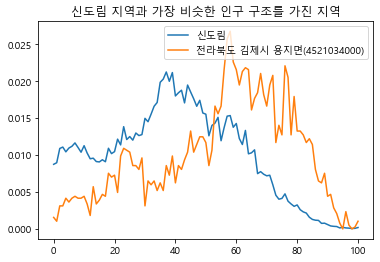

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') # 글씨체 불러오기
plt.title(name+' 지역과 가장 비슷한 인구 구조를 가진 지역') # 그래프 제목 설정
plt.plot(home, label=name)          # home 값을 그리는 그래프 레이블 설정
plt.plot(result, label=result_name) # result 값을 그리는 그래프 레이블 설정
plt.legend()                        # 범례 표기
plt.show()

분명 비슷한 지역이라고 했는데 그래프는 별로 안비슷해 보이는 이유는???

In [13]:
s = home - away
print(s)

[ 0.00026466  0.0041148   0.00459256  0.00356856  0.00389404  0.00658515
  0.00197934  0.00413205  0.00521146  0.00384038  0.00448349  0.00470251
  0.00440909  0.0030354   0.00209451  0.00204084  0.00500202  0.00303714
  0.00025682  0.00074416 -0.00504665  0.00027929  0.0011977  -0.0019081
 -0.00753007 -0.00300737 -0.0088224  -0.00276674 -0.0028732  -0.00298141
  0.00552038  0.00118637  0.00462967  0.00497588  0.00572807  0.00870736
  0.0062283   0.01010266  0.00447895  0.00687141  0.00540172  0.00534631
  0.00690696  0.00349311  0.00808934  0.00618074  0.00502606  0.00182513
  0.00020645  0.00042809 -0.00361076 -0.00120348 -0.00271656 -0.00118274
 -0.00525191 -0.00526741 -0.00349645 -0.00048597 -0.00501041 -0.00513935
  0.00021778 -0.00133677 -0.00820089  0.00145993 -0.00219106  0.00085149
 -0.00213913 -0.0029354  -0.00193998 -0.0022888  -0.00395766 -0.00169587
 -0.00492276 -0.00464833 -0.0022766  -0.002654   -0.00421814 -0.00569568
 -0.00364768 -0.00421204 -0.00402421 -0.00515293 -0.

In [14]:
# 예시

def ave(x):
    return sum(x) / len(x)

a = [1, 2, 3]
b = [1, -2, 4]
c = [1, 2, 4]
print(ave(a))
print(ave(b))
print(ave(c))

2.0
1.0
2.3333333333333335


#### s = np.sum(home - away)에 제곱하여 (-)값 (+)로 바꿔주기

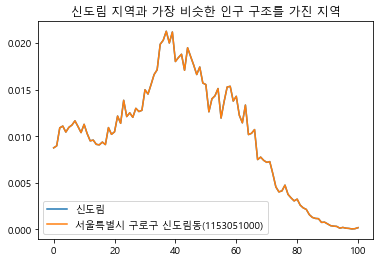

In [15]:
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
mn = 1

result_name = ''
result = 0

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
    away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum((home - away) ** 2) # 제곱하여 (-)값 (+)로 바꾸기
    if s < mn:
        mn = s
        result_name = row[0]
        result = away
        
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.title(name+' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()

이제 진짜 신도림이랑 가장 비슷한 인구 구조를 가진 지역을 찾아보자

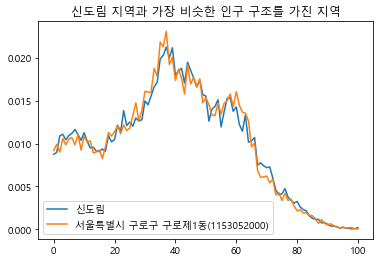

In [16]:
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
mn = 1

result_name = ''
result = 0

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
    away = np.array(row[3:], dtype=int) / int(row[2])
    s = np.sum((home - away) ** 2)
    if s < mn and name not in row[0]: # name에 입력된 지역은 제외(신도림을 제외한 지역에서 찾기)
        mn = s
        result_name = row[0]
        result = away
        
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.title(name+' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()

### P. 249

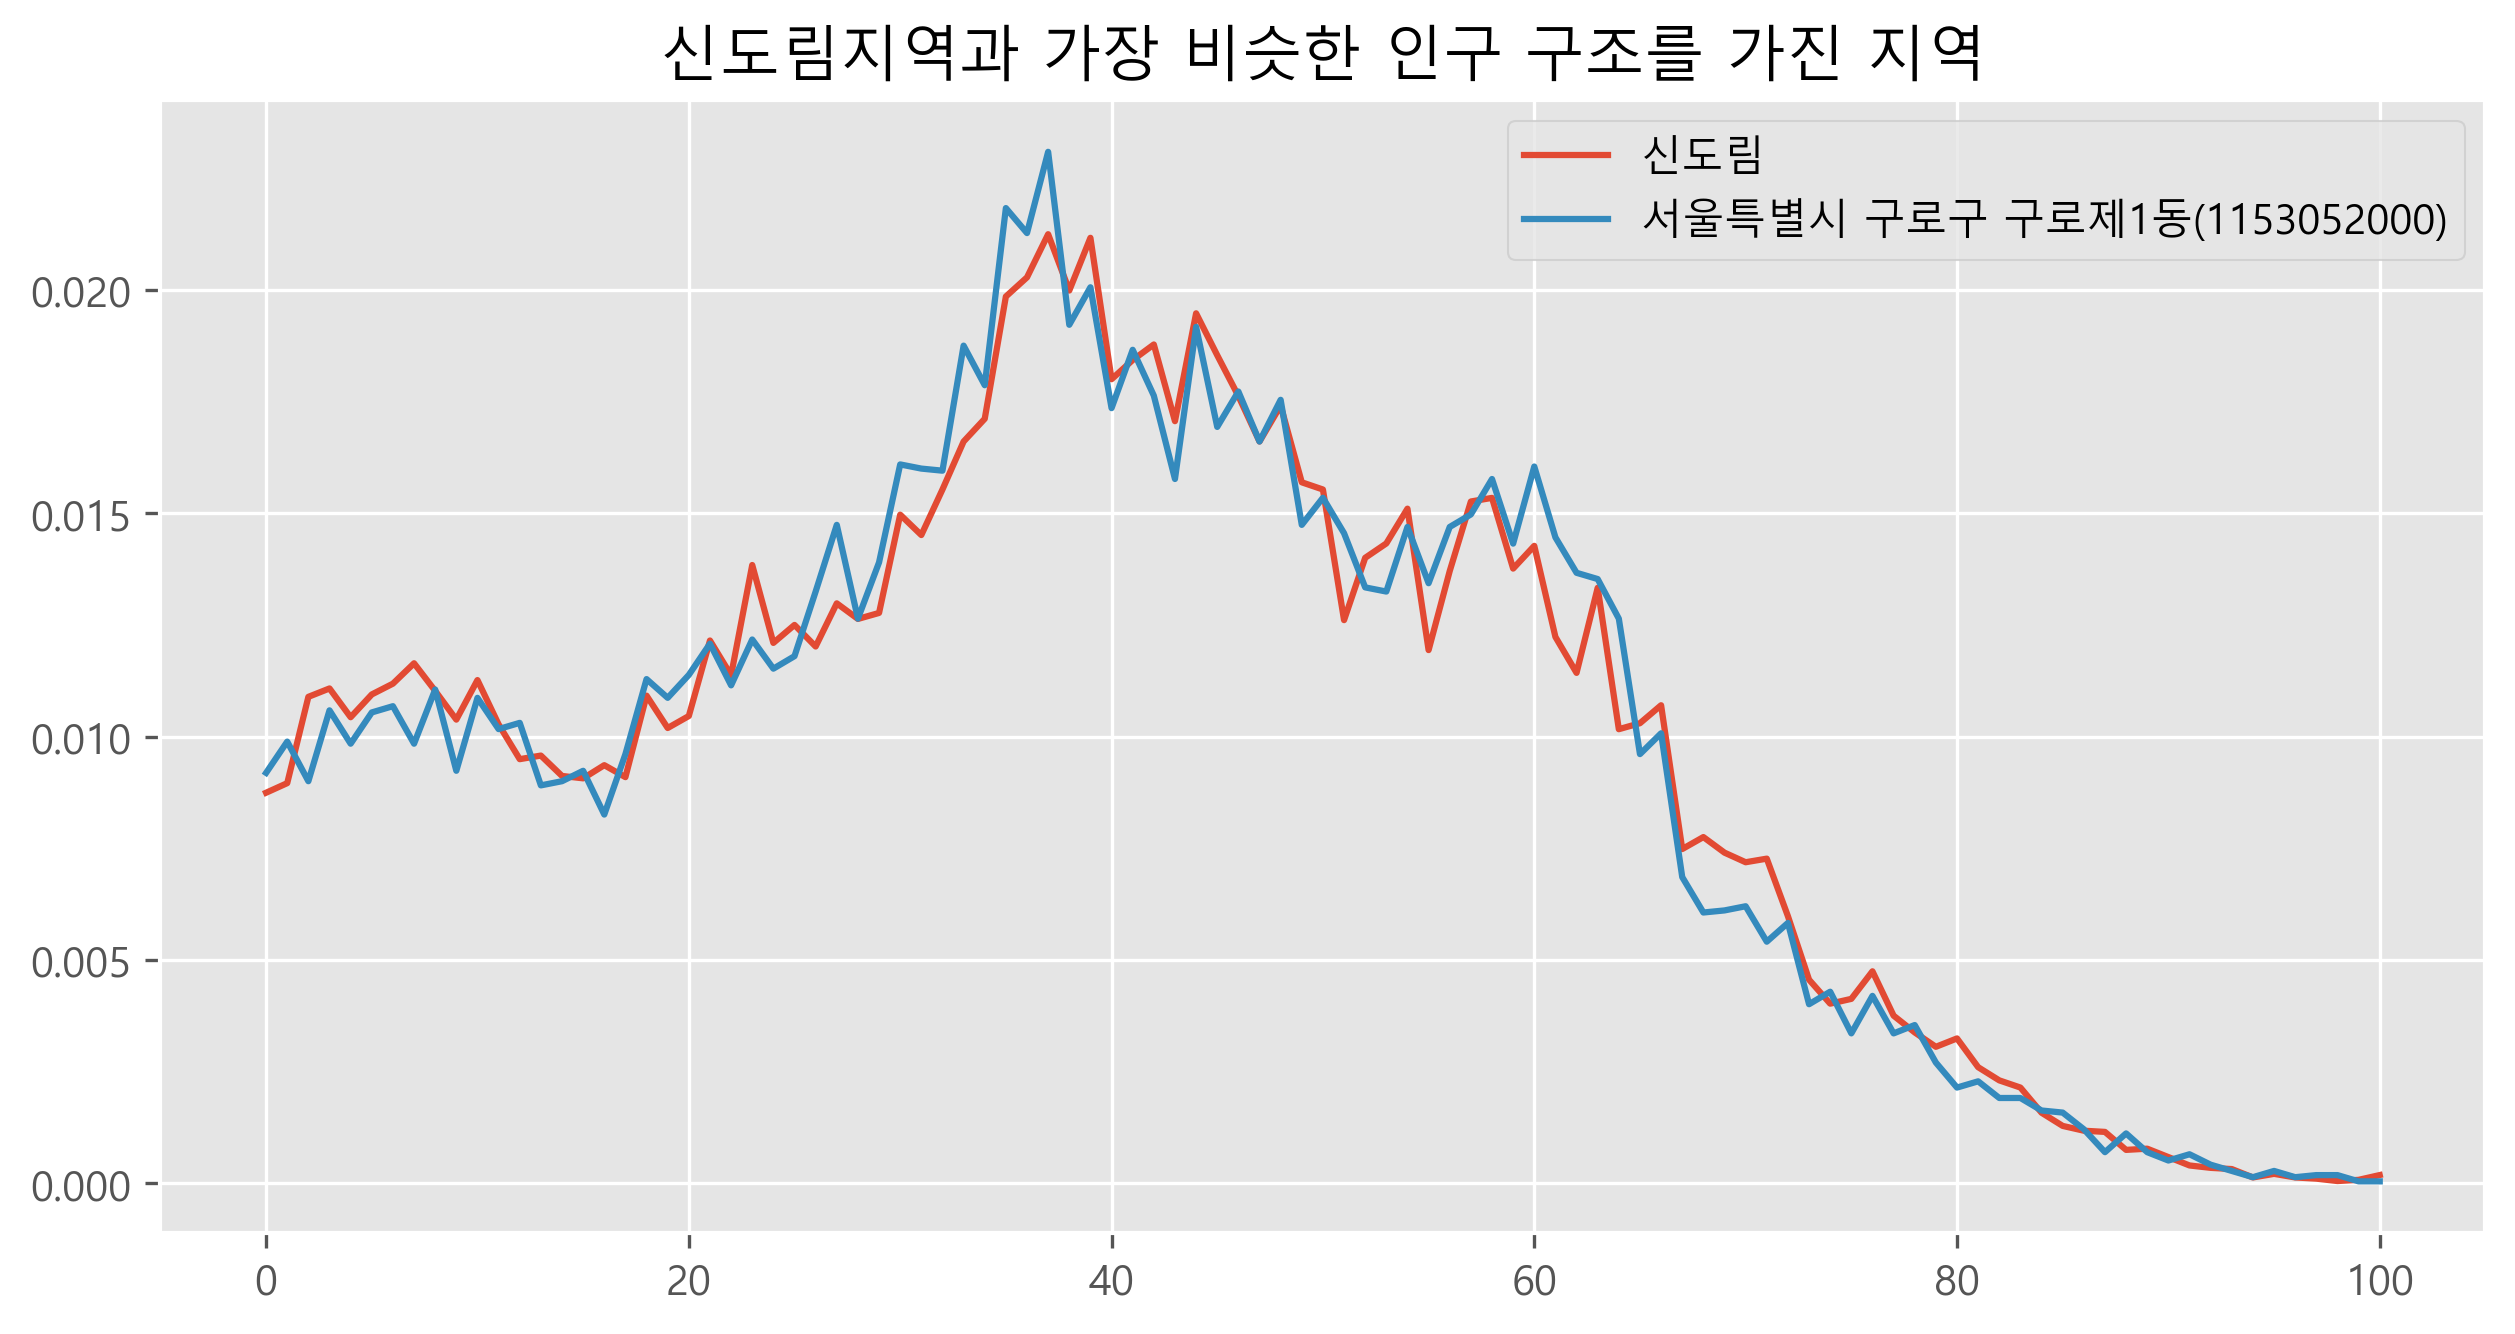

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# 데이터를 읽어온다.
f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)        # 불필요한 헤더 부분 제외
data = list(data) # data 변수를 list로 저장하여 불러온 데이터를 여러 번 사용


# 궁금한 지역의 이름을 입력받는다.
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
mn = 1            # 최솟값을 저장할 변수 생성 및 초기화
result_name = ''  # 최솟값을 갖는 지역의 이름을 저장할 변수 생성 및 초기화
result = 0        # 최솟값을 갖는 지역의 연령대별 인구 비율을 저장할 배열 생성 및 초기화


# 궁금한 지역의 인구 구조를 저장한다.
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype = int) / int(row[2])

        
# 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
for row in data:
    away = np.array(row[3:], dtype = int) / int(row[2])
    s = np.sum((home - away) ** 2)        # 제곱하여 (-)값 (+)로 바꾸기
    if s < mn and name not in row[0]:    # name에 입력된 지역은 제외(신도림을 제외한 지역에서 찾기)
        mn = s
        result_name = row[0]
        result = away

        
# 궁금 지역의 인구 구조와 가장 비슷한 곳의 인구 구조를 시각화한다.
plt.style.use('ggplot')
plt.figure(figsize = (10 , 5), dpi = 300) # figsize(가로길이,세로길이), dpi = 해상도(인치당 도트 수)
plt.rc('font', family = 'Malgun Gothic')  # 글씨체 불러오기
plt.title(name + '지역과 가장 비슷한 인구 구조를 가진 지역') # 그래프 제목 설정
plt.plot(home, label = name)              # home 값을 그리는 그래프 레이블 설정
plt.plot(result, label = result_name)     # result 값을 그리는 그래프 레이블 설정
plt.legend()                              # 범례 표기
plt.show()

[326 334 406 413 389 408 417 434 411 387 420 383 354 357 340 338 349 339
 407 380 390 453 424 516 451 466 448 484 471 476 558 541 579 619 638 740
 756 792 745 789 671 687 700 636 726 691 657 619 649 585 579 470 522 534
 563 445 511 569 572 513 532 456 426 497 379 384 399 279 289 276 268 271
 223 170 150 154 177 140 126 114 121  97  86  80  59  48  44  43  28  29
  22  15  13  12   5   8   5   4   2   3   7]
[ 45  52  73  70  63  62  79  84  70  69 100  86 110  91 119 120 127 137
 165 135 142 133 157 143 141 134 117 141 113 110 111 105  92  99 113 109
 122 146 136 152 130 125 116 139 123 162 157 211 191 214 197 170 154 189
 177 157 152 154 151 157 146 161 136 179 165 141 157  99 119 123 132 110
  92  87  83  79  71  78  57  55  57  48  50  48  39  36  33  18  23  24
  11  12   8  10   3   8   2   3   4   0   3]


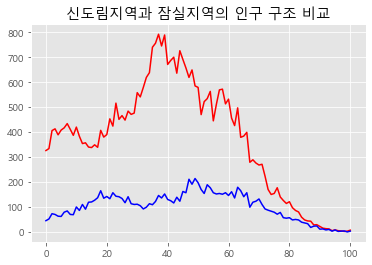

In [18]:
# 14-8
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)

name1 = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
name2 = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')

for row in data:
    if name1 in row[0]:
        home1 = np.array(row[3:], dtype=int)

    if name2 in row[0]:
        home2 = np.array(row[3:], dtype=int)        

print(home1)
print(home2)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title(name1+'지역과 ' + name2+'지역의 인구 구조 비교')
plt.plot(home1, color='r')
plt.plot(home2, color='b')
plt.show()


[8.74745090e-03 8.96211227e-03 1.08940646e-02 1.10818933e-02
 1.04379092e-02 1.09477300e-02 1.11892240e-02 1.16453794e-02
 1.10282280e-02 1.03842439e-02 1.12697220e-02 1.02769132e-02
 9.49876570e-03 9.57926371e-03 9.12310830e-03 9.06944295e-03
 9.36460234e-03 9.09627563e-03 1.09208973e-02 1.01964152e-02
 1.04647419e-02 1.21552002e-02 1.13770527e-02 1.38456585e-02
 1.21015348e-02 1.25040249e-02 1.20210368e-02 1.29870130e-02
 1.26381883e-02 1.27723516e-02 1.49726307e-02 1.45164753e-02
 1.55361168e-02 1.66094236e-02 1.71192444e-02 1.98561769e-02
 2.02854996e-02 2.12514758e-02 1.99903402e-02 2.11709778e-02
 1.80047226e-02 1.84340453e-02 1.87828700e-02 1.70655790e-02
 1.94805195e-02 1.85413760e-02 1.76290651e-02 1.66094236e-02
 1.74144038e-02 1.56971128e-02 1.55361168e-02 1.26113556e-02
 1.40066545e-02 1.43286466e-02 1.51067940e-02 1.19405388e-02
 1.37114951e-02 1.52677901e-02 1.53482881e-02 1.37651605e-02
 1.42749812e-02 1.22356982e-02 1.14307180e-02 1.33358377e-02
 1.01695825e-02 1.030374

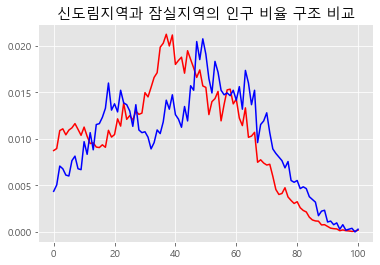

In [19]:
#14-8 을 비율로 나타낸 것
import numpy as np
import csv

f = open("C:/Users/jhjh3/unit_14/age.csv")
data = csv.reader(f)
next(data)

name1 = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
name2 = input('인구 구조를 비교하고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')

for row in data:
    if name1 in row[0]:
        home1 = np.array(row[3:], dtype=int) / int(row[2])

    if name2 in row[0]:
        home2 = np.array(row[3:], dtype=int) / int(row[2])

print(home1)
print(home2)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title(name1+'지역과 ' + name2+'지역의 인구 비율 구조 비교')
plt.plot(home1, color='r')
plt.plot(home2, color='b')
plt.show()

ㅠ잘햇어,,